In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice


In [2]:

#Input 
experiments = int(input("Enter the number of experiments to simulate: "))
N = int(input("Enter the number of doors (at least 3): "))


In [3]:


#initialize vectors
def initialize_vectors(N):
    return (
        np.zeros(N - 2),  # Switcher
        np.zeros(N - 2),  # Newcomer
        np.zeros(N - 2),  # Conservative
        np.zeros(3)       # Winnings: [Conservative, Newcomer, Switcher]
    )


In [4]:

#Simulate one Monty Hall experiment with N doors and M doors opened.
#Returns the state of doors and final choices for each strategy.
def simulate_experiment(N, M):
    doors = [False] * N
    car_position = np.random.randint(0, N)
    doors[car_position] = True

    initial_choice = np.random.randint(0, N)

    #Select M doors to be opened by the host (not the car and not the initial choice)
    eligible_to_open = [i for i in range(N) if i != car_position and i != initial_choice]
    doors_opened = np.random.choice(eligible_to_open, M, replace=False)

    #Strategies
    conservative = initial_choice
    available_after_opening = [i for i in range(N) if i not in doors_opened]
    newcomer = choice(available_after_opening)
    switch_choices = [i for i in available_after_opening if i != initial_choice]
    switcher = choice(switch_choices)

    return doors, conservative, newcomer, switcher


In [5]:

#Run the full set of experiments.
#Returns the results vectors and total wins per strategy.
def run_simulation(N, experiments):
    if N < 3:
        raise ValueError("N must be at least 3.")

    switcher_vector, newcomer_vector, conservative_vector, winnings = initialize_vectors(N)

    for i in range(experiments):
        for j in range(N - 2):
            M = j + 1  #Number of doors to open
            doors, conservative, newcomer, switcher = simulate_experiment(N, M)

            #Check winners
            if doors[conservative]:
                conservative_vector[j] += 1
                if M == N - 2:
                    winnings[0] += 1
            if doors[newcomer]:
                newcomer_vector[j] += 1
                if M == N - 2:
                    winnings[1] += 1
            if doors[switcher]:
                switcher_vector[j] += 1
                if M == N - 2:
                    winnings[2] += 1

    return conservative_vector, newcomer_vector, switcher_vector, winnings 


In [6]:
#Execute simulation
conservative_vector, newcomer_vector, switcher_vector, winnings = run_simulation(N, experiments)

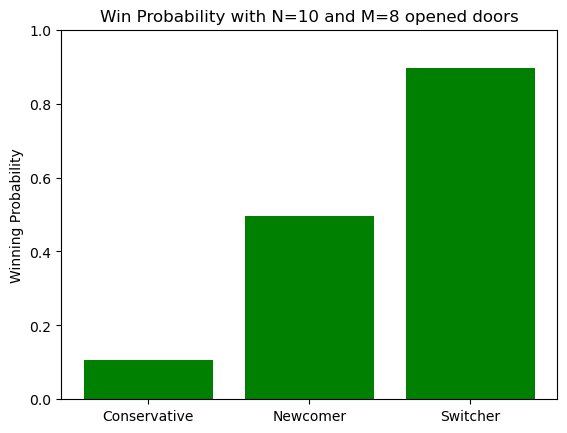

In [7]:

#Plot final win probabilities for each strategy when M = N - 2
def plot_final_probabilities(winnings, experiments, N):
    labels = ['Conservative', 'Newcomer', 'Switcher']
    probabilities = winnings / experiments

    plt.bar(labels, probabilities, color='green')
    plt.ylabel('Winning Probability')
    plt.title(f'Win Probability with N={N} and M={N - 2} opened doors')
    plt.ylim(0, 1)
    plt.show() 

plot_final_probabilities(winnings, experiments, N)


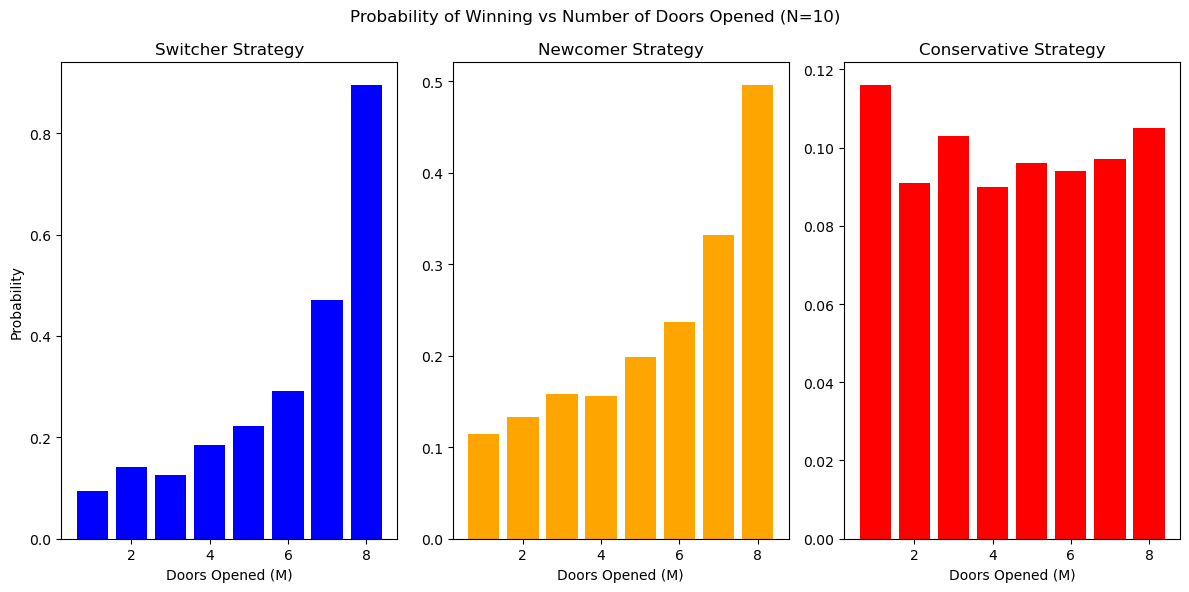

In [9]:

#Plot win probability as a function of the number of opened doors (M)
def plot_probabilities_by_M(N, experiments, vectors):
    switcher_vector, newcomer_vector, conservative_vector = vectors
    M_values = np.arange(1, N - 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(131)
    plt.bar(M_values, switcher_vector / experiments, color='blue')
    plt.title('Switcher Strategy')
    plt.xlabel('Doors Opened (M)')
    plt.ylabel('Probability')

    plt.subplot(132)
    plt.bar(M_values, newcomer_vector / experiments, color='orange')
    plt.title('Newcomer Strategy')
    plt.xlabel('Doors Opened (M)')

    plt.subplot(133)
    plt.bar(M_values, conservative_vector / experiments, color='red')
    plt.title('Conservative Strategy')
    plt.xlabel('Doors Opened (M)')

    plt.suptitle(f'Probability of Winning vs Number of Doors Opened (N={N})')
    plt.tight_layout()
    plt.show()

plot_probabilities_by_M(N, experiments, (switcher_vector, newcomer_vector, conservative_vector))
